In [25]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def power(a, b):
    ans = 1
    while b > 0:
        ans = ans * a
        b = b - 1
    return ans

In [27]:
def power(a, b):
    if b <= 1:
        return a
    else:
        return a * power(a, b - 1)

In [28]:
def power(a, b):
    if b <= 1:
        return a
    else:
        if b % 2 == 0:
            return power(a * a, b // 2)
        else:
            return a * power(a, b - 1)

In [29]:
def constant(n):
    iterations = 0
    iterations = iterations + 1
    return iterations

print('Constant Time:', constant(10))

Constant Time: 1


In [30]:
def logarithmic(n):
    iterations = 0
    i = 1
    while i < n:
        iterations = iterations + 1
        i = 2 * i
    return iterations

print('Logarithmic Time:', logarithmic(10))

Logarithmic Time: 4


In [31]:
def linear(n):
    iterations = 0
    i = 1
    while i < n:
        iterations = iterations + 1
        i = i + 1
    return iterations

print('Linear Time:', linear(10))

Linear Time: 9


In [32]:
def log_linear(n):
    iterations = 0
    i = 1
    while i < n:
        j = 1
        while j < n:
            iterations = iterations + 1
            j = 2 * j
        i = i + 1
    return iterations

print('Log-Lineae Time:', log_linear(10))

Log-Lineae Time: 36


In [47]:
def polynomial(n):
    iterations = 0
    i = 1
    while i < n:
        j = 1
        while j < n:
            iterations = iterations + 1
            j = j + 1
        i = i + 1
    return iterations

print('Polynomial Time:', polynomial(10))

Polynomial Time: 81


In [34]:
def exponential(n):
    if n == 1:
        return 1
    else:
        return exponential(n - 1) + exponential(n - 1)

print('Exponential Time:', exponential(10))

Exponential Time: 512


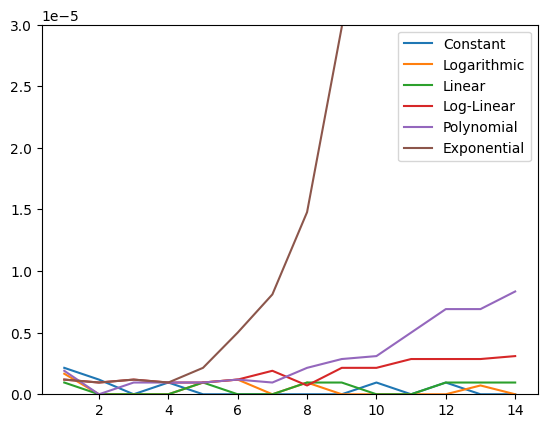

In [61]:
X = list(range(1, 15))
Y_const = []
Y_log = []
Y_lin = []
Y_log_lin = []
Y_poly = []
Y_exp = []

for i in X:
    start = time.time()
    constant(i)
    end = time.time()
    Y_const.append(end - start)

for i in X:
    start = time.time()
    logarithmic(i)
    end = time.time()
    Y_log.append(end - start)
    
for i in X:
    start = time.time()
    linear(i)
    end = time.time()
    Y_lin.append(end - start)

for i in X:
    start = time.time()
    log_linear(i)
    end = time.time()
    Y_log_lin.append(end - start)

for i in X:
    start = time.time()
    polynomial(i)
    end = time.time()
    Y_poly.append(end - start)

for i in X:
    start = time.time()
    exponential(i)
    end = time.time()
    Y_exp.append(end - start)

# plt.gca().set_aspect('equal')
plt.plot(X, Y_const, label='Constant')
plt.plot(X, Y_log, label='Logarithmic')
plt.plot(X, Y_lin, label='Linear')
plt.plot(X, Y_log_lin, label='Log-Linear')
plt.plot(X, Y_poly, label='Polynomial')
plt.plot(X, Y_exp, label='Exponential')
plt.ylim((0, 0.00003))
plt.legend()
plt.show()